# HOUSE PRICE PROJECT

## 1. About the Dataset
This is a real dataset of house prices sold in Seattle, Washing, USA between August and December 2022. 
<br> The task is to predict the house price in this area based on several features, which are described below.

<br> **Feature Description:**
- beds: Number of bedrooms in property
- baths: Number of bathrooms in property. Note 0.5 corresponds to a half-bath which has a sink and toilet but no tub or shower
- size: Total floor area of property
- size_units: Units of the previous measurement
- lot_size: Total area of the land where the property is located on. The lot belongs to the house owner
- lot_size_units: Units of the previous measurement
- zip_code: Zip code. This is a postal code used in the USA
- price: Price the property was sold for (US dollars)

## 2. Loading the data 

In [477]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [478]:
#Import dataset
train = pd.read_csv('C:/Users/XPS 13 9365/OneDrive/Desktop/HousePrice/data/train.csv')
test = pd.read_csv('C:/Users/XPS 13 9365/OneDrive/Desktop/HousePrice/data/test.csv')

In [479]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'lot_size'}>],
       [<Axes: title={'center': 'zip_code'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

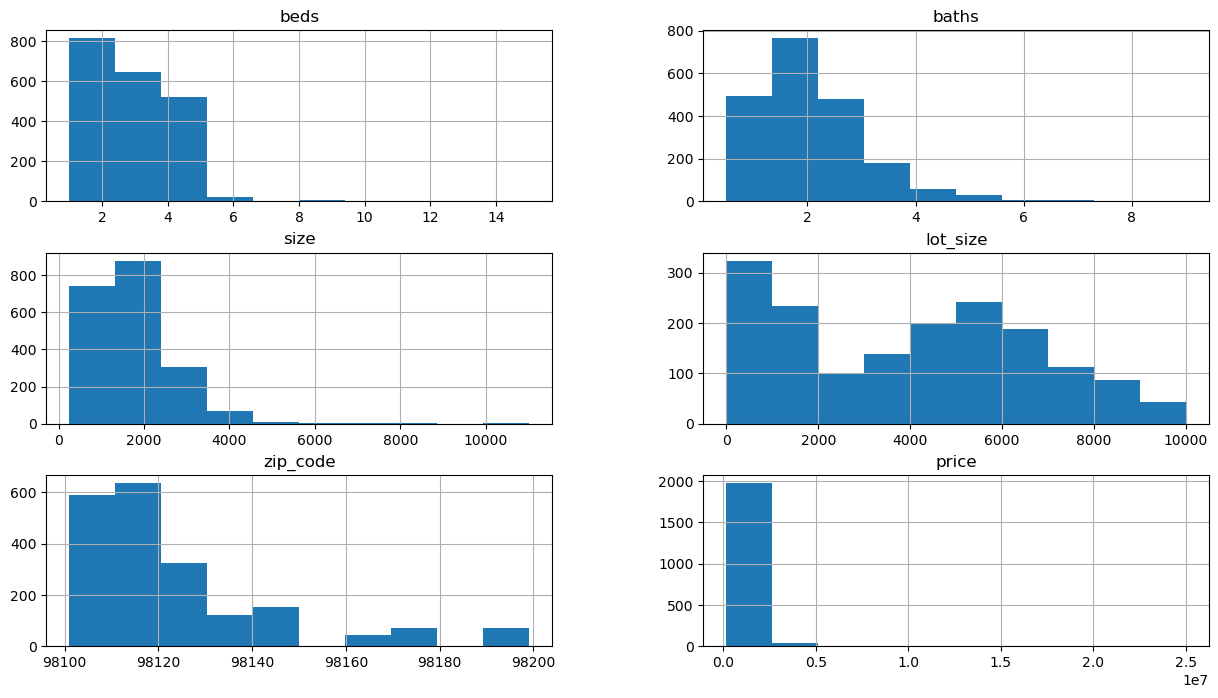

In [480]:
train.hist(figsize=(15,8))

In [481]:
train.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [482]:
train.drop(train_df.columns[[3, 5, 6]], axis=1, inplace=True)

In [483]:
test.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [484]:
test.drop(test_df.columns[[3,5,6]], axis=1, inplace=True)

In [485]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  1669 non-null   float64
 4   price     2016 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 78.9 KB


In [486]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      505 non-null    int64  
 1   baths     505 non-null    float64
 2   size      505 non-null    float64
 3   lot_size  428 non-null    float64
 4   price     505 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.9 KB


## 3. Data Imputation

In [492]:
from sklearn.impute import KNNImputer

In [493]:
#train_set
for i in range(len(train.columns)):
    missing_train_data = train[train.columns[i]].isna().sum()
    perc = missing_train_data/len(train) * 100
    print(f"Column {i} has {perc}% missing values")

Column 0 has 0.0% missing values
Column 1 has 0.0% missing values
Column 2 has 0.0% missing values
Column 3 has 17.21230158730159% missing values
Column 4 has 0.0% missing values


In [494]:
#impute data for train set
from sklearn.impute import SimpleImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
imputer.fit(train.iloc[:,3:4])
train.iloc[:,3:4] = imputer.transform(train.iloc[:,3:4])

In [495]:
#test_set
for m in range(len(test.columns)):
    missing_test_data = test[test.columns[m]].isna().sum()
    percentage = missing_test_data/len(test) * 100
    print(f"Column {m} has {percentage}% missing values")

Column 0 has 0.0% missing values
Column 1 has 0.0% missing values
Column 2 has 0.0% missing values
Column 3 has 15.247524752475247% missing values
Column 4 has 0.0% missing values


In [496]:
#impute data for test set
imputer.fit(test.iloc[:,3:4])
test.iloc[:,3:4] = imputer.transform(test.iloc[:,3:4])

In [497]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  2016 non-null   float64
 4   price     2016 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 78.9 KB


In [498]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      505 non-null    int64  
 1   baths     505 non-null    float64
 2   size      505 non-null    float64
 3   lot_size  505 non-null    float64
 4   price     505 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.9 KB


In [499]:
X_train = train.drop(['price'],axis=1)
y_train = train['price']

In [500]:
X_test = test.drop(['price'],axis=1)
y_test = test['price']

In [501]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train.iloc[:,0:4])
X_test_normalized = sc.transform(X_test.iloc[:,0:4])

In [502]:
X_train_normalized.shape

(2016, 4)

In [503]:
X_train_normalized

array([[ 1.13454946e-01,  3.39427577e-01,  9.28639396e-01,
         8.60671262e-01],
       [ 9.10406759e-01, -1.59686934e-01,  5.48165058e-01,
        -1.56483628e+00],
       [ 9.10406759e-01,  8.38542087e-01,  3.30751151e-01,
        -3.56000815e-02],
       ...,
       [ 9.10406759e-01, -1.59686934e-01,  4.39458105e-01,
         9.61739298e-01],
       [-6.83496868e-01, -1.59686934e-01, -1.02265042e+00,
         3.67683373e-16],
       [ 1.13454946e-01, -1.59686934e-01, -2.79817953e-02,
         1.60067636e-01]])

In [504]:
y_train

0        795000.0
1        915000.0
2        950000.0
3       1950000.0
4        950000.0
          ...    
2011     910000.0
2012     550000.0
2013    1150000.0
2014     590000.0
2015     659000.0
Name: price, Length: 2016, dtype: float64

## 4. Split the dataset
Here I will split the train set into 80% train and 20% validation.

In [505]:
from sklearn.model_selection import train_test_split

X_train_1, X_valid, y_train_1, y_valid = train_test_split(X_train_normalized,y_train,train_size = 0.8, test_size = 0.2, random_state=0)

In [506]:
X_train_1.shape

(1612, 4)

In [507]:
X_train.shape

(2016, 4)

In [508]:
X_valid

array([[-6.83496868e-01,  8.38542087e-01, -5.54123451e-01,
         3.67683373e-16],
       [-1.48044868e+00, -1.15791596e+00, -1.21941001e+00,
        -1.56481202e+00],
       [ 9.10406759e-01,  1.33765660e+00,  1.57001042e+00,
        -2.00543116e-01],
       ...,
       [-6.83496868e-01, -6.58801445e-01, -2.01912921e-01,
         1.32720132e+00],
       [ 9.10406759e-01,  3.39427577e-01,  1.24207940e-01,
        -4.10360359e-01],
       [ 1.13454946e-01, -1.59686934e-01,  8.09061747e-01,
         7.91540725e-01]])

## 5. Train Maching Learning Model

In [509]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [510]:
dtr.fit(X_train_1, y_train_1)

DecisionTreeRegressor()

In [511]:
y_train_pred = dtr.predict(X_train_1)

In [512]:
from sklearn.metrics import mean_absolute_error as mae

In [513]:
y_train_1 = np.array(y_train_1)
y_train_1

array([820000., 525000., 315000., ..., 550000., 599950., 325000.])

In [514]:
y_train_pred

array([820000., 525000., 315000., ..., 550000., 599950., 325000.])

In [515]:
train_mae= mae(y_train_1,y_train_pred)
train_mae

2947.446856906535

In [516]:
train_MAE = []
for i in range(len(y_train_1)):
    sum = abs(y_train_1[i] - y_train_pred[i])
    train_MAE.append(sum)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a35bc1e0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a35bc1f490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a35bc1d890>],
 'medians': [<matplotlib.lines.Line2D at 0x2a35bc285d0>],
 'fliers': [],
 'means': []}

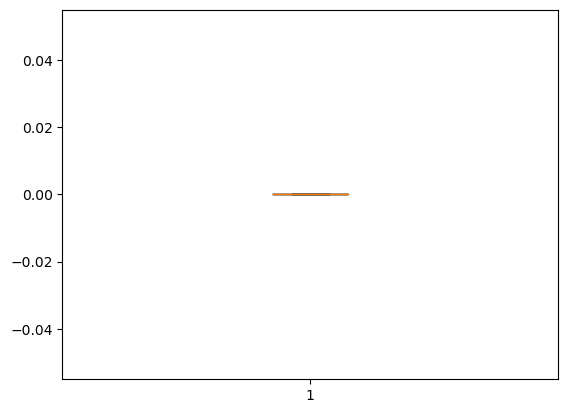

In [518]:
plt.boxplot(train_MAE,showfliers=False)

In [519]:
MAE = []
for i in train_MAE:
    if i > 0.0:
        MAE.append(i)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a35b294890>,
 'caps': [<matplotlib.lines.Line2D at 0x2a35b6e8590>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a35b6decd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a35b6e9510>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a35b6e9c90>],
 'means': []}

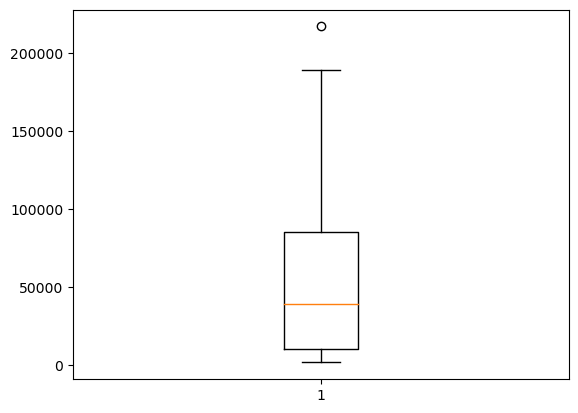

In [521]:
plt.boxplot(MAE)

In [522]:
y_val_pred = dtr.predict(X_valid)

In [523]:
y_valid

1358     589990.0
1343     369950.0
1529    2485000.0
1471     530000.0
1900     813000.0
          ...    
1988    1098000.0
799     1270000.0
1238    1550000.0
298      945000.0
52       800000.0
Name: price, Length: 404, dtype: float64

In [524]:
y_valid = np.array(y_valid)
y_valid

array([ 589990.,  369950., 2485000.,  530000.,  813000.,  489000.,
        340000.,  685000.,  560000.,  552450.,  985000.,  920000.,
        950000.,  725000.,  700000., 1050000., 2010000., 1725000.,
       1025000., 2750000.,  450000.,  612500.,  700000., 1350000.,
        509950.,  624999., 1850000., 1637500.,  679950.,  850000.,
       1750000.,  670000., 1050000.,  705000.,  675000.,  850000.,
        330000.,  905000.,  309000., 1352000.,  475000.,  659000.,
        745000.,  734000., 1345000.,  330000.,  570288.,  500000.,
        583000.,  849950., 1000000.,  655000., 2485000.,  549000.,
        677000., 1460000., 1095000.,  670000.,  524950.,  650000.,
        555000., 1219700.,  575000., 1150000., 1725000.,  980000.,
       1315000.,  750000.,  620000.,  799000., 1180000.,  525000.,
       1125000.,  905000.,  160000., 1439000., 1600000., 5000000.,
        975000.,  815000., 1065000., 1485000.,  730000.,  920000.,
       1445000.,  434000.,  325000.,  960000.,  523750.,  8700

In [525]:
y_val_pred

array([ 885000.  ,  399900.  , 2450000.  ,  390000.  ,  545000.  ,
        749000.  ,  480000.  ,  599900.  ,  490000.  ,  351000.  ,
       1125000.  ,  700000.  ,  730000.  ,  600000.  ,  830000.  ,
        626000.  , 1599500.  , 1180000.  ,  825000.  ,  376000.  ,
        437500.  ,  625000.  , 1850000.  ,  650000.  ,  437500.  ,
        634999.  , 2250000.  , 2250000.  ,  427000.  , 1000000.  ,
       1950000.  ,  580000.  ,  750000.  ,  479950.  ,  750000.  ,
        699950.  ,  335000.  ,  899000.  ,  345000.  , 1118000.  ,
        411000.  , 1190000.  ,  745000.  ,  775000.  , 1130000.  ,
        650000.  , 1100000.  ,  775000.  ,  780000.  ,  850000.  ,
       1000000.  ,  675000.  , 3300000.  ,  605000.  ,  590000.  ,
       1398000.  ,  780000.  ,  899000.  ,  399000.  ,  975000.  ,
        700000.  , 1820000.  ,  625000.  ,  825000.  , 1575000.  ,
       1300000.  , 1100000.  ,  799000.  ,  480000.  , 1150000.  ,
        938000.  , 1800000.  ,  950000.  , 1005000.  ,  769950

In [526]:
val_mae= mae(y_valid,y_val_pred_1)
val_mae

229308.9900990099

In [527]:
val_MAE = []
for i in range(len(y_valid)):
    sum = abs(y_valid[i] - y_val_pred_1[i])
    val_MAE.append(sum)

In [528]:
val_MAE

[99910.0,
 8300.0,
 685000.0,
 159900.0,
 213000.0,
 282500.0,
 38250.0,
 110000.0,
 60000.0,
 47550.0,
 295100.0,
 5000.0,
 111000.0,
 35100.0,
 65000.0,
 360100.0,
 210000.0,
 425500.0,
 274500.0,
 1911000.0,
 71750.0,
 12500.0,
 599500.0,
 50500.0,
 131700.0,
 64901.0,
 925000.0,
 362500.0,
 301700.0,
 75000.0,
 250000.0,
 70000.0,
 125000.0,
 15100.0,
 250000.0,
 75000.0,
 48250.0,
 20000.0,
 69250.0,
 427000.0,
 96750.0,
 266000.0,
 55100.0,
 565500.0,
 506000.0,
 359900.0,
 194712.0,
 225000.0,
 182000.0,
 160050.0,
 75000.0,
 80000.0,
 535000.0,
 140900.0,
 12900.0,
 160500.0,
 305000.0,
 169000.0,
 146700.0,
 121500.0,
 45000.0,
 280300.0,
 114900.0,
 225000.0,
 450000.0,
 141000.0,
 15500.0,
 15000.0,
 20000.0,
 126000.0,
 119500.0,
 774500.0,
 110000.0,
 215500.0,
 529900.0,
 514000.0,
 200000.0,
 2786141.0,
 145500.0,
 110000.0,
 55500.0,
 15000.0,
 195000.0,
 148500.0,
 55000.0,
 55750.0,
 53250.0,
 35000.0,
 241250.0,
 270000.0,
 635100.0,
 125000.0,
 91000.0,
 280000.0,
 

{'whiskers': [<matplotlib.lines.Line2D at 0x2a35b73d610>,
 'caps': [<matplotlib.lines.Line2D at 0x2a35b73ea10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a35b73ce10>],
 'medians': [<matplotlib.lines.Line2D at 0x2a35b73f8d0>],
 'fliers': [],
 'means': []}

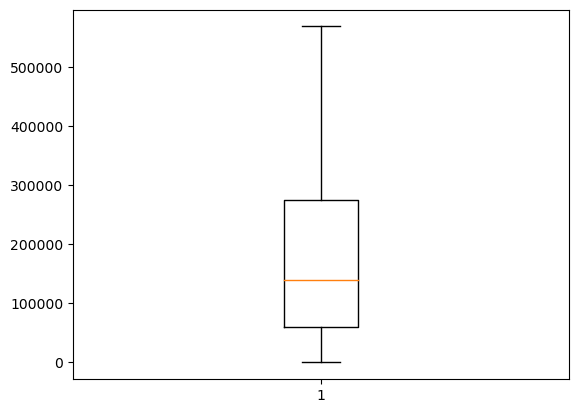

In [529]:
plt.boxplot(val_MAE,showfliers=False)

In [413]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ['best', 'random'],
    "max_depth": [5,10,30,50,100],
    "min_samples_split": [2,4,6,8,10],
    "max_features": [2,3,4,10],
    "ccp_alpha": [0,0.1,0.4,0.5,1]
}

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring = "neg_mean_absolute_error",return_train_score=True)
grid_search.fit(X_train_1, y_train_1)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0, 0.1, 0.4, 0.5, 1],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 30, 50, 100],
                         'max_features': [2, 3, 4, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [414]:
best_dtr= grid_search.best_estimator_
best_dtr

DecisionTreeRegressor(ccp_alpha=0.1, criterion='absolute_error', max_depth=5,
                      max_features=3, min_samples_split=6)

In [415]:
best_dtr.fit(X_train_1, y_train_1)

DecisionTreeRegressor(ccp_alpha=0.1, criterion='absolute_error', max_depth=5,
                      max_features=3, min_samples_split=6)

In [416]:
y_val_pred_1 = best_dtr.predict(X_valid)

In [538]:
mae(best_dtr.predict(X_valid), y_valid)

229308.9900990099

In [417]:
y_val_pred_1

array([ 689900.,  378250., 1800000.,  689900.,  600000.,  771500.,
        378250.,  575000.,  500000.,  600000.,  689900.,  925000.,
        839000.,  689900.,  765000.,  689900., 1800000., 1299500.,
       1299500.,  839000.,  378250.,  600000., 1299500., 1299500.,
        378250.,  689900.,  925000., 1275000.,  378250.,  925000.,
       1500000.,  600000.,  925000.,  689900.,  925000.,  925000.,
        378250.,  925000.,  378250.,  925000.,  378250.,  925000.,
        689900., 1299500.,  839000.,  689900.,  765000.,  725000.,
        765000.,  689900.,  925000.,  575000., 1950000.,  689900.,
        689900., 1299500.,  790000.,  839000.,  378250.,  771500.,
        600000., 1500000.,  689900.,  925000., 1275000.,  839000.,
       1299500.,  765000.,  600000.,  925000., 1299500., 1299500.,
       1015000., 1120500.,  689900.,  925000., 1800000., 2213859.,
       1120500.,  925000., 1120500., 1500000.,  925000.,  771500.,
       1500000.,  378250.,  378250.,  925000.,  765000.,  6000

In [422]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_1, y_train_1)

RandomForestRegressor()

In [464]:
rfr.score(X_train_1, y_train_1)

0.8870418012556103

In [468]:
y_train_pred_rfr = rfr.predict(X_train_1)

In [469]:
mae(y_train_1, y_train_pred_rfr)

100328.29082307208

In [465]:
y_val_pred_rfr = rfr.predict(X_valid)

In [466]:
mae(y_valid, y_val_pred_rfr)

249479.40171291682

In [532]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [30,50,100],
    "max_depth":[5,10,50],
    "max_features": [2,3,4,5],
    "ccp_alpha": [0,0.1,0.5,1]
}

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring = "neg_mean_absolute_error",return_train_score=True)
grid_search.fit(X_train_1, y_train_1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0, 0.1, 0.5, 1],
                         'max_depth': [5, 10, 50], 'max_features': [2, 3, 4, 5],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [533]:
best_rfr= grid_search.best_estimator_

In [534]:
best_rfr

RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=2,
                      n_estimators=30)

In [536]:
best_rfr.fit(X_valid, y_valid)

RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=2,
                      n_estimators=30)

In [537]:
mae(best_rfr.predict(X_valid), y_valid)

114871.80926417079

In [432]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [433]:
lin = LinearRegression()
svr = SVR()
sgd = SGDRegressor()
gpr = GaussianProcessRegressor()
knr = KNeighborsRegressor()
gbr = GradientBoostingRegressor()
mlp = MLPRegressor()
las = Lasso()

In [442]:
models = {"a":["LinearRegression", lin],
        "b": ["LassoRegression",las],
        "c":["KNeighborsRegressor", knr],
        "d":["DecisionTreeRegressor",dtr],
        "e":["GradientBoostingRegressor",gbr],
        "f":["RandomForestRegressor", rfr],
        "g": ["SVR", svr],
        "h": ["GaussianProcessRegressor", gpr],
        "i": ["SGDRegressor", sgd]
        }

In [445]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train_1, y_train=y_train_1):
    cv = KFold(n_splits=10, shuffle = True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [447]:
lin.fit(X_train_1, y_train_1)

LinearRegression()

In [448]:
y_train_pred_lin = lin.predict(X_train_1)

In [449]:
y_train_pred_lin

array([ 967475.06642924, 1154151.50840081,  467902.59967797, ...,
       1007602.28726831,  940080.3985747 ,  588723.85427747])

In [450]:
train_mae_lin= mae(y_train_1,y_train_pred_lin)
train_mae_lin

260557.55945119765

In [451]:
train_MAE_lin = []
for i in range(len(y_train_1)):
    sum = abs(y_train_1[i] - y_train_pred_lin[i])
    train_MAE_lin.append(sum)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a359890810>,
 'caps': [<matplotlib.lines.Line2D at 0x2a359012a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a359890250>],
 'medians': [<matplotlib.lines.Line2D at 0x2a359010a50>],
 'fliers': [],
 'means': []}

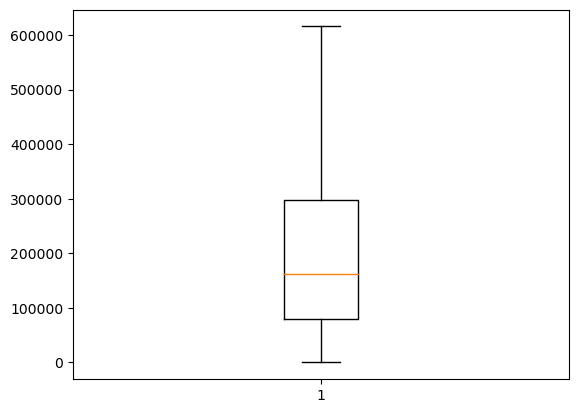

In [453]:
plt.boxplot(train_MAE_lin, showfliers=False)

In [456]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_jobs": [5,10,15,50]
}

grid_search = GridSearchCV(lin, param_grid, cv=5, scoring = "neg_mean_absolute_error",return_train_score=True)
grid_search.fit(X_train_1, y_train_1)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [5, 10, 15, 50]}, return_train_score=True,
             scoring='neg_mean_absolute_error')

In [457]:
best_lin = grid_search.best_estimator_

In [458]:
best_lin

LinearRegression(n_jobs=5)

In [459]:
best_lin.fit(X_train_1, y_train_1)

LinearRegression(n_jobs=5)

In [461]:
y_train_pred_lin1 = best_lin.predict(X_train_1)

In [462]:
mae(y_train_1, y_train_pred_lin1)

260557.55945119765

In [471]:
best_lin.fit(X_valid, y_valid)

LinearRegression(n_jobs=5)

In [472]:
y_val_pred_lin = best_lin.predict(X_valid)

In [473]:
mae(y_valid, y_val_pred_lin)

238338.11021949942

## Evaluate the model

In [540]:
best_rfr.fit(X_test_normalized, y_test)

RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=2,
                      n_estimators=30)

In [541]:
y_test_pred = best_rfr.predict(X_test_normalized)

In [542]:
y_test_pred

array([1164065.52862489, 1311004.41279481,  681721.65492871,
        699269.23396825, 1183403.50723623,  703581.95160256,
        420467.23236837, 1715195.32967033,  997241.31177076,
        448577.91628719,  958150.59796852,  563779.47550505,
        916479.93326057,  749040.18966184,  378036.93001374,
       1991664.49666667, 1214447.84299373,  701943.78270639,
        904538.57669221, 1010712.822657  ,  617360.43152109,
       1267864.46872227,  768047.46374623,  491501.38850941,
        646174.47928343,  736031.51086719,  559996.42768732,
        620422.72711511, 1016380.98008502,  540756.5788499 ,
        518636.35393408,  690578.74434824, 1577499.12020221,
        510806.21453223,  828618.26811308, 1030735.98072651,
        536772.28244855, 1162404.29866955, 1499136.16602062,
       1151017.68001462, 1472380.9013822 ,  756665.23159667,
       1476175.        , 1407803.81598168, 2560658.13333333,
       1631401.23809524, 1028216.59253846,  882970.42292459,
       1232339.49755707,

In [544]:
X_test_normalized

array([[ 0.11345495,  0.83854209,  1.21127748,  0.1329814 ],
       [ 0.91040676,  2.83500013,  1.41782069,  0.45720766],
       [ 0.11345495, -1.15791596, -0.484551  ,  0.88007632],
       ...,
       [ 0.11345495,  0.33942758,  1.31998443, -1.56477159],
       [ 1.70735857,  2.83500013,  1.3852086 ,  0.41071637],
       [ 0.11345495, -0.15968693, -0.47259324, -0.35214517]])

In [549]:
X_test_dataframe = pd.DataFrame(X_test_normalized, columns=['beds','baths','size','lot_size'])

In [550]:
y_test_pred_dataframe = pd.DataFrame(y_test_pred, columns=['price'])

In [554]:
final = pd.DataFrame({'actual:': y_test, 'prediction': y_test_pred})
final

,actual:,prediction
0,1175000.0,1.164066e+06
1,1057500.0,1.311004e+06
2,799000.0,6.817217e+05
3,565000.0,6.992692e+05
4,1187000.0,1.183404e+06
...,...,...
500,3800000.0,3.629341e+06
501,575000.0,6.800224e+05
502,3105000.0,2.528414e+06
503,1807000.0,1.690235e+06


In [556]:
final.isnull().sum()

actual:       0
prediction    0
dtype: int64